In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#load training data

train_set = torchvision.datasets.MNIST(
    root='./Data',
    train=True,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
)


In [7]:
#defining model sstructure

class Network(nn.Module):
    
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding = 0)
        self.conv2 = nn.Conv2d(32, 64, 5)
        
        self.fc1 = nn.Linear(64 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 60)
        self.fc3 = nn.Linear(60, 10)
        
    def forward(self, x):
        
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x,kernel_size=2, stride=2)
        
        
        x = x.view(-1, 64 * 4 * 4)
        
        x = self.fc1(x)
        x = F.relu(x)
        
        x = self.fc2(x)
        x = F.relu(x)
        
        x = self.fc3(x)
        #x = F.softmax(x, dim=1)   #not needed as the cost function itself does one-hot encoding
        
        return x
    
net = Network()


 epoch: 0 total correct: 56757 cost: 104.01792530830426
Accuracy: 0.94595 


 epoch: 1 total correct: 58734 cost: 44.89501142653171
Accuracy: 0.9789 


 epoch: 2 total correct: 58928 cost: 37.444684726559444
Accuracy: 0.9821333333333333 


 epoch: 3 total correct: 59018 cost: 35.59328624102818
Accuracy: 0.9836333333333334 


 epoch: 4 total correct: 59104 cost: 34.534283917666016
Accuracy: 0.9850666666666666 


 epoch: 5 total correct: 59178 cost: 32.05556681052258
Accuracy: 0.9863 


 epoch: 6 total correct: 59277 cost: 29.58067970093998
Accuracy: 0.98795 


 epoch: 7 total correct: 59261 cost: 31.99109859935561
Accuracy: 0.9876833333333334 


 epoch: 8 total correct: 59325 cost: 29.683872553701804
Accuracy: 0.98875 


 epoch: 9 total correct: 59418 cost: 25.71884663555693
Accuracy: 0.9903 



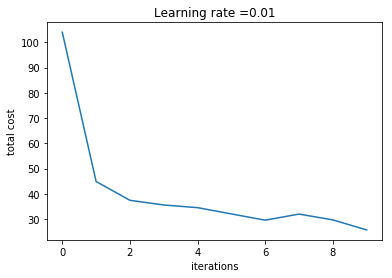

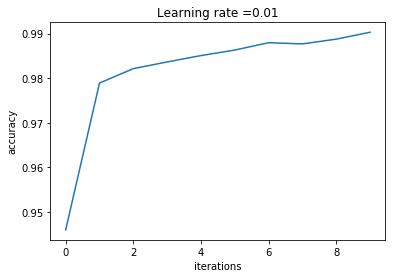

In [8]:
Learning_rate =0.01

#making training batches
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
#Using Adam potimizer
optimizer = optim.Adam(net.parameters(), lr=Learning_rate)
costs=[]
accuracies=[]

for epoch in range(10): #number of epoch
    
    total_cost = 0         #total cost of one full epoch
    total_correct = 0      #total correct predictions in one full epoch
    
    for batch in train_loader:
    
        images, labels = batch    #images is input, labels is the expected output
        
        #predicts output taking batch of images as input by using the model Network defined above 
        preds = net(images)       
        
        #calculates cost of individual batch
        cost = F.cross_entropy(preds,labels)
        
        
        #print('iter:',epoch,'batch:',batch_count,'cost:',cost)
        
        optimizer.zero_grad()    #empty the gradients
        cost.backward()          #calculates gradients
        optimizer.step()         #updates parameters
        
        #for calculating total cost in one epoch
        total_cost += cost.item()
        
        #for calculating total correct predictions in one epoch
        total_correct += preds.argmax(dim=1).eq(labels).sum().item()
        #print('\n\n pred',preds.argmax(dim =1),'label', labels)
        
    print('\n epoch:',epoch,'total correct:',total_correct,'cost:',total_cost)
    print('Accuracy:',total_correct/60000,'\n')
    costs.append(total_cost)
    accuracies.append(total_correct/60000)
    
#plotting the cost and accuracies

plt.plot(costs)
plt.ylabel('total cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(Learning_rate))
plt.show()

plt.plot(accuracies)
plt.ylabel('accuracy')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(Learning_rate))
plt.show()

In [5]:
#use this to save the model and its parameters a file
#ignore warning, if any

torch.save(net,'./trained_mnist_model_CNN.pth' )


/home/shreyash/anaconda3/lib/python3.7/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Network. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [6]:
#load test set
test_set = torchvision.datasets.MNIST(
    root='./Data',
    train=False,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
)


In [7]:
#load the learned model
net_test = torch.load('trained_mnist_model_CNN.pth')
net_test.eval()

Network(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=1024, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (fc3): Linear(in_features=60, out_features=10, bias=True)
)

In [8]:
#load a batch of test cases
test_loader = torch.utils.data.DataLoader(test_set, batch_size=100)
total_correct = 0

for batch in test_loader:   #iterating over batches
    
    images, labels = batch
    
    preds = net_test(images.float())
    total_correct += preds.argmax(dim=1).eq(labels).sum().item()

print('Accuracy:',total_correct/10000,'\n')




Accuracy: 0.9758 

